# Identifizierung von Beschriftungen, die den Hintergrund berühren
In der Entwicklungsbiologie ist es eine häufige Aufgabe, Zellschichten zu unterscheiden, zum Beispiel in epithelialem Gewebe. Daher kann es nützlich sein zu wissen, ob eine Zelle Teil einer äußeren Schicht ist, ob sie den Hintergrund berührt. In diesem Notebook messen und visualisieren wir dies.

Zur Demonstration simulieren wir einen Zellhaufen.

In [1]:
import pyclesperanto_prototype as cle

# import a function from a file in the same folder
from simulated_cell_clumb import simulate_data

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
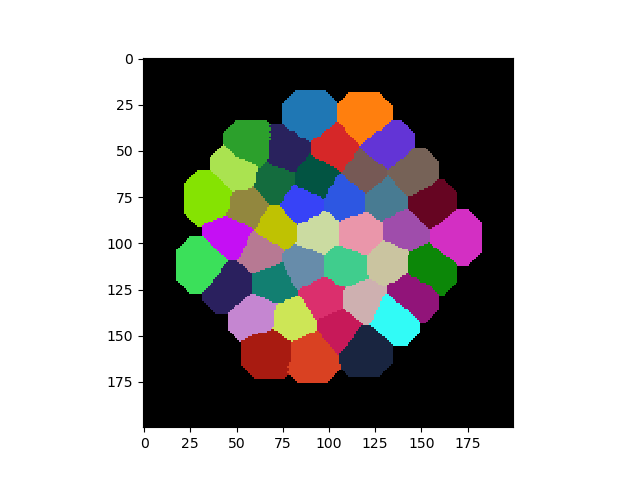

In [2]:
cells = simulate_data()
cells

## Bestimmen, welche Zellen den Hintergrund berühren
Um festzustellen, welche Zellen den Hintergrund berühren, müssen wir eine Berührungsmatrix erstellen, die uns anzeigt, welche Objekte welche anderen berühren.

cl.OCLArray([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.]], dtype=float32)
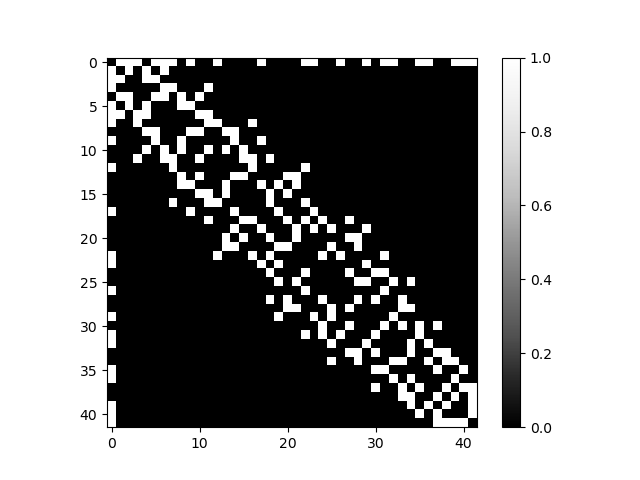
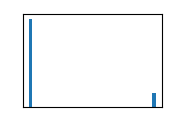

In [3]:
touch_matrix = cle.generate_touch_matrix(cells)
touch_matrix

Die erste Zeile und Spalte in diesem Bild repräsentieren Objekte, die den Hintergrund berühren. Wir können diese erste Zeile oder Spalte wie folgt auslesen:

In [4]:
touching_background = touch_matrix[0]
touching_background

cl.OCLArray([0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1.], dtype=float32)

Und wir können es in den ursprünglichen Bildkoordinaten visualisieren.

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
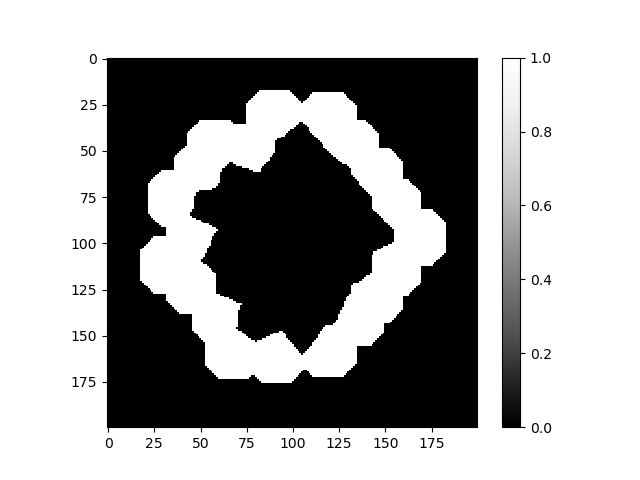
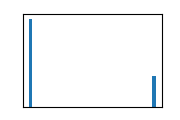

In [5]:
cle.replace_intensities(cells, touching_background)

Oder wir können ein Beschriftungsbild erhalten, das diese Objekte darstellt.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
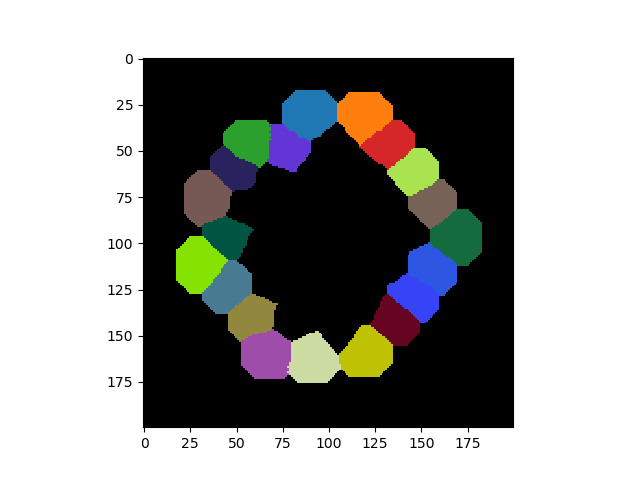

In [6]:
cle.exclude_labels(cle.binary_not([touching_background]), cells)